# projet data sciences : le titanic 

## importation des biblioteques :

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## on commence par l'importation des valeurs :
import du fichier test qui servira à tester si une personne entre ou pris au hassard a survecu ou non

todo : add visualization of the raw data 

In [26]:
titanic_train_data = pd.read_csv('data/train.csv',sep=',',header = 0)
titanic_test_data =pd.read_csv('data/test.csv',sep=',',header = 0)

titanic_train_data.head(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S



 je les étudies (graphs, statistiques, signification, ...) c'est à dire pour afficher

  montre clairement que les femmes ont survécu plus que les hommes

  # nombre de personnes decede en fonction du sex

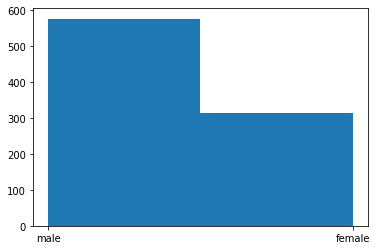

In [27]:
plt.hist(titanic_train_data['Sex'], bins=2) 
plt.show()

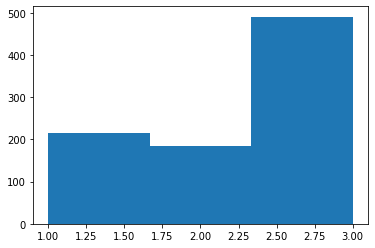

In [28]:
#....nombre de personne decede en fonction de la classe qu'elle occupait sur le bateau

plt.hist(titanic_train_data['Pclass'], bins=3) 
plt.show()

In [29]:
# je nettoie et séléctionne celles qui me semble les plus pertinentes
embarked_to_number = {'C': 1, 'Q': 2,'S' : 3 }
titanic_train_data['Embarked_to_number'] = titanic_train_data['Embarked'].map(embarked_to_number)

sex_to_number={'male':1,'female':2}
titanic_train_data['Sex_to_number'] = titanic_train_data['Sex'].map(sex_to_number)


titanic_parameters = ['Fare','Age','Sex_to_number','Embarked_to_number','Pclass','Survived']
titanic_data_selected_to_clean = titanic_train_data[titanic_parameters]
titanic_data_cleaned_no_nan = titanic_data_selected_to_clean.dropna()


titanic_parameters = ['Fare','Age','Sex_to_number','Embarked_to_number','Pclass']
titanic_train_data_selected_no_nan = titanic_data_cleaned_no_nan[titanic_parameters]
titanic_train_data_survived = titanic_data_cleaned_no_nan['Survived']



In [30]:
# je créer mon modèle
from sklearn.linear_model import LogisticRegression
sklearn_LogisticRegression = LogisticRegression(max_iter=100)


sklearn_SVC = SVC(kernel = 'linear', C=1)


In [31]:
# J'apprend sur les données
sklearn_SVC.fit(titanic_train_data_selected_no_nan,titanic_train_data_survived)

sklearn_LogisticRegression.fit(titanic_train_data_selected_no_nan, titanic_train_data_survived)


# Je prédis
predicted_titanic_train_data_survived = sklearn_SVC.predict(titanic_train_data_selected_no_nan)
predicted_titanic_train_data_survived_logistic = sklearn_LogisticRegression.predict(titanic_train_data_selected_no_nan)

In [32]:
 

# Je mesure la qualité de ma prédiction
print("Resultats SVC")

print("\n")
print("Resultats régression logistique")
from sklearn.metrics import classification_report

print(classification_report(titanic_train_data_survived, predicted_titanic_train_data_survived))



Resultats SVC


Resultats régression logistique
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       424
           1       0.75      0.68      0.71       288

    accuracy                           0.78       712
   macro avg       0.77      0.76      0.77       712
weighted avg       0.78      0.78      0.78       712



## utilisation d'un autre modele pour prédire

# prediction en utilisant une classification aléatoire

In [33]:

from sklearn.ensemble import RandomForestClassifier

y = titanic_train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(titanic_train_data[features])
X_test = pd.get_dummies(titanic_test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : titanic_test_data.PassengerId , 'Survived': predictions})
output = pd.DataFrame({'Name' : titanic_test_data.Name , 'Survived': predictions})

print("Resultats classification aléatoire")

print(output)

Resultats classification aléatoire
                                             Name  Survived
0                                Kelly, Mr. James         0
1                Wilkes, Mrs. James (Ellen Needs)         1
2                       Myles, Mr. Thomas Francis         0
3                                Wirz, Mr. Albert         0
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)         1
..                                            ...       ...
413                            Spector, Mr. Woolf         0
414                  Oliva y Ocana, Dona. Fermina         1
415                  Saether, Mr. Simon Sivertsen         0
416                           Ware, Mr. Frederick         0
417                      Peter, Master. Michael J         0

[418 rows x 2 columns]


code pour montrer la survie en fonction du prix...
mais il y a une petite errreur sur cette ligne.... toute fois en exécutant le code,
on obtient bien le graphe montrant la survie en fonction du prix

# tracer la survie avec le prix


In [34]:


plt.figure(figsize=(10, 10),dpi=80)


survived_fare = titanic_train_data[titanic_train_data['Survived'] == 1]['Fare']
dead_fare = titanic_train_data[titanic_train_data['Survived'] == 0]['Fare']


plt.hist([survived_fare, dead_fare], bins=50, stacked=True,
         rwidth=0.8, color=['green', 'red'], label=['Survived', 'Dead'])

plt.xlabel('Tarif')
plt.ylabel('Nombre de passagers')

plt.axes([0, 550, 0, 350])
plt.grid()
# je sais pas ce que tu as voulu faire avec le legend :
# plt.legend(True)
plt.show()


# cela montre que les personnes qui avaient réservé des billets à bas prix sont les plus décédées


ValueError: Image size of 761x719952 pixels is too large. It must be less than 2^16 in each direction.